# IMT 547 Project Part III: Preliminary Analysis

Chesie Yu

02/19/2024

<style type = "text/css">  
    body {
        font-family: "Serif"; 
        font-size: 12pt;
    }
    em {
        color: #4E7F9E;
    }
    strong {
        color: #436D87;
    }
    li {
        color: #4E7F9E;
    }
    ul {
        color: #4E7F9E;
    }
    img {
        display: block;
        margin: auto;
    } 
    .jp-RenderedHTMLCommon a:link { 
        color: #94C1C9;
    }
    .jp-RenderedHTMLCommon a:visited { 
        color: #94C1C9;
    }
    .jp-RenderedHTMLCommon code {
        color: #4E7F9E;
    }  
    .mark {
        color: #B00D00;
        background-color: #FFF7B1;
    }
</style>

_This notebook outlines the **preliminary analysis** process (partially) for the **YouTube Gaming Comment Toxicity** project._    

**Components**  
1. **Summary Statistics**: Basic summary statistics for the dataset.  
2. **Visualizations & EDA**: Visualizations on distribution of toxicity, sentiment, engagement metrics, and word frequency.  

**Functions**   
- **`generate_wordcloud(text, image_path="../asset/image/yt.png", min_font_size=30, max_font_size=135, max_words=250)`**: Generate and display a word cloud for a given text.   

In [1]:
# Import the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Configuration and setup
warnings.filterwarnings("ignore", category = FutureWarning)

## 0. Load the Data

In [2]:
# Unzip the data file
import zipfile
with zipfile.ZipFile("../data/yt-cleaned.zip", "r") as zip_ref:
    zip_ref.extractall("../data")

In [3]:
# Load the data
yt = pd.read_csv("../data/yt-cleaned.csv")
yt.head(3)

,channel_id,channel_name,channel_description,channel_country,channel_uploads_id,channel_viewcount,channel_subscribercount,channel_videocount,video_id,video_title,...,comment_ocean,comment_giving,comment_contentment,comment_writing,comment_rural,comment_positive_emotion,comment_musical,comment_cleaned,comment_tokenized,video_genre
0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,I make videos.,JP,UU-lHJZR3Gqxm24_Vd_AJ5Yw,29238461440,111000000,4753,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,damn dude even mimic think would take approxim...,"['damn', 'dude', 'even', 'mimic', 'think', 'wo...",action
1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,I make videos.,JP,UU-lHJZR3Gqxm24_Vd_AJ5Yw,29238461440,111000000,4753,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,...,0.0,0.0,0.038462,0.0,0.0,0.038462,0.0,pewds thought would turn gaming early channel ...,"['pewds', 'thought', 'would', 'turn', 'gaming'...",action
2,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,I make videos.,JP,UU-lHJZR3Gqxm24_Vd_AJ5Yw,29238461440,111000000,4753,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,actually awesome cannot believe meme became tr...,"['actually', 'awesome', 'can', 'not', 'believe...",action


In [4]:
# Check the dimensions
print(f"Number of rows: {yt.shape[0]}\n"
      f"Number of columns: {yt.shape[1]}\n")

# Check for missing values
print(f"Number of missing values: {yt.isna().sum().sum()}")

Number of rows: 128461
Number of columns: 440

Number of missing values: 0


### Summary Statistics

In [5]:
# Check the time range
yt["video_creation_time"].min(), yt["video_creation_time"].max()

('2011-04-22 01:05:52+00:00', '2024-02-24 20:30:42+00:00')

In [6]:
# Number of unique channels
print(f"Number of unique channels: {yt['channel_id'].nunique()}")

Number of unique channels: 33


In [7]:
# Number of unique videos
print(f"Number of unique videos: {yt['video_id'].nunique()}")

Number of unique videos: 1341


In [8]:
# Print the summary statistics
yt.describe()

,channel_viewcount,channel_subscribercount,channel_videocount,video_viewcount,video_likecount,video_commentcount,video_toxicity,video_severe_toxicity,video_identity_attack,video_insult,...,comment_weapon,comment_children,comment_monster,comment_ocean,comment_giving,comment_contentment,comment_writing,comment_rural,comment_positive_emotion,comment_musical
count,1.284610e+05,1.284610e+05,128461.000000,1.284610e+05,1.284610e+05,128461.000000,128461.000000,128461.000000,128461.000000,128461.000000,...,128461.000000,128461.000000,128461.000000,128461.000000,128461.000000,128461.000000,128461.000000,128461.000000,128461.000000,128461.000000
mean,1.168603e+10,2.504986e+07,5653.964355,3.864929e+06,1.245159e+05,7197.079176,0.354115,0.074385,0.062637,0.167806,...,0.002566,0.004801,0.001679,0.001070,0.003442,0.001363,0.000789,0.000800,0.019227,0.009202
std,7.679399e+09,1.980973e+07,19638.884129,6.128022e+06,1.703881e+05,11748.123808,0.090229,0.054289,0.030902,0.067903,...,0.016397,0.022445,0.014591,0.010705,0.019522,0.012285,0.008366,0.008865,0.049576,0.034743
min,1.738381e+09,1.420000e+07,111.000000,2.935000e+03,4.600000e+01,15.000000,0.026146,0.001488,0.005402,0.009679,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483535e+09,1.520000e+07,1547.000000,8.135880e+05,2.082300e+04,894.000000,0.298391,0.037655,0.042086,0.120653,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.242811e+09,1.900000e+07,3495.000000,2.003487e+06,5.860500e+04,2741.000000,0.358272,0.064107,0.057543,0.163935,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.664641e+10,2.590000e+07,4795.000000,4.529292e+06,1.508500e+05,8692.000000,0.407214,0.097577,0.076405,0.206525,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.923846e+10,1.110000e+08,160451.000000,1.087467e+08,1.594298e+06,151326.000000,0.810352,0.496831,0.268888,0.539528,...,0.500000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.333333,1.000000,0.500000


## 1. Toxicity Score Distribution

In [9]:
# Average toxicity
toxicity_cols = ["comment_toxicity", "comment_severe_toxicity", "comment_identity_attack", 
                 "comment_insult", "comment_profanity", "comment_threat"]
yt[toxicity_cols].mean()

comment_toxicity           0.113445
comment_severe_toxicity    0.008641
comment_identity_attack    0.013565
comment_insult             0.043104
comment_profanity          0.063811
comment_threat             0.033367
dtype: float64

In [10]:
# Define the threshold alpha
alpha = 0.5

# Create binary labels for toxicity
for col in toxicity_cols:
    yt[f"is_{col}"] = yt[col] > alpha          

In [11]:
# Number of columns exhibiting toxicity
is_toxicity_cols = ["is_comment_toxicity", "is_comment_severe_toxicity", 
                    "is_comment_identity_attack", "is_comment_insult", 
                    "is_comment_profanity", "is_comment_threat"]
yt[is_toxicity_cols].sum()

is_comment_toxicity           2775
is_comment_severe_toxicity       2
is_comment_identity_attack      33
is_comment_insult              525
is_comment_profanity          2162
is_comment_threat             1128
dtype: int64

In [12]:
# Proportion of toxic comments
yt[is_toxicity_cols].sum() / yt.shape[0]

is_comment_toxicity           0.021602
is_comment_severe_toxicity    0.000016
is_comment_identity_attack    0.000257
is_comment_insult             0.004087
is_comment_profanity          0.016830
is_comment_threat             0.008781
dtype: float64

### Toxicity Distribution

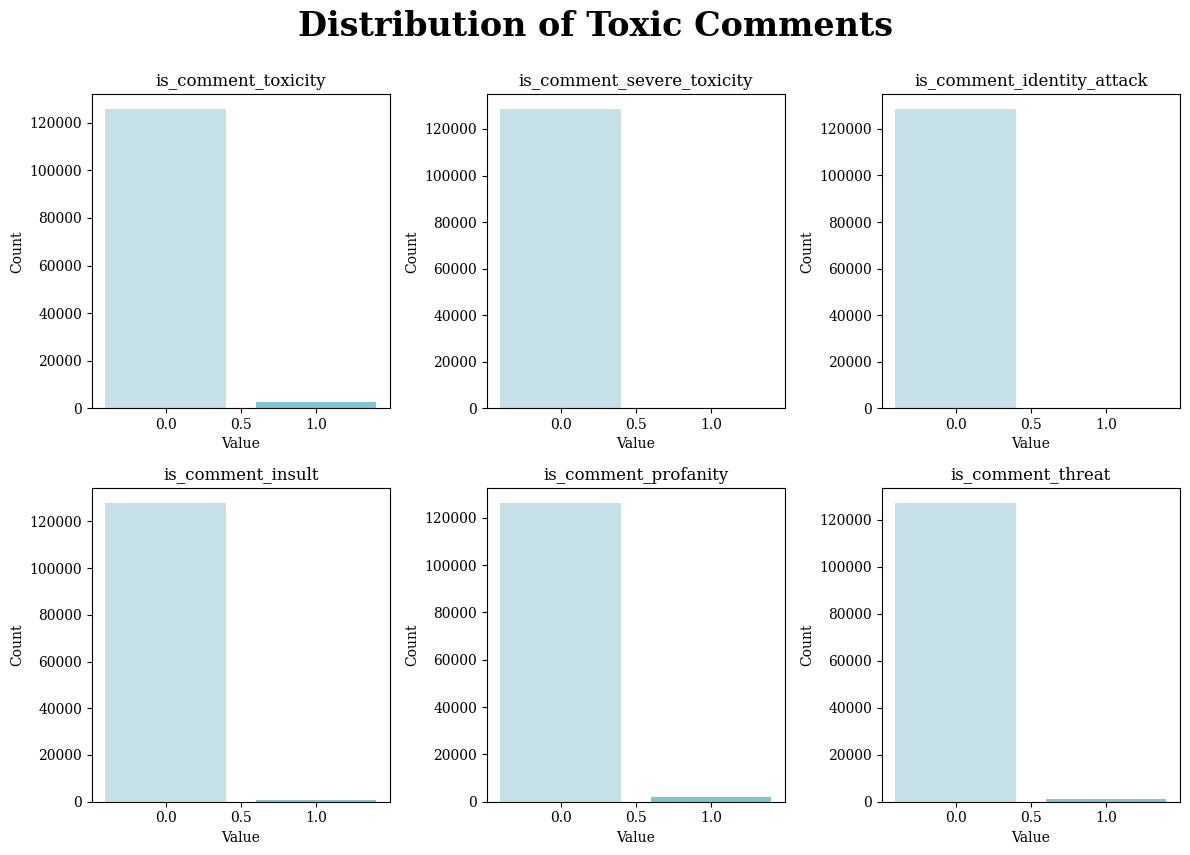

In [13]:
# Set up the figure with subplots
plt.rcParams.update({"font.family": "serif"})
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8.5))

# Visualize the class distribution for each column
for i, col in enumerate(is_toxicity_cols):
    counts = yt[col].value_counts()
    axes[i // 3, i % 3].bar(counts.index, counts.values, color = ["#C5E1E7", "#7DC6D4"])
    axes[i // 3, i % 3].set_title(col)
    axes[i // 3, i % 3].set_xlabel("Value")
    axes[i // 3, i % 3].set_ylabel("Count")

# Display the plot
fig.suptitle("Distribution of Toxic Comments", 
             size = 24, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/01a-toxicity-distribution.png", dpi=300, transparent=True)
plt.show()

### Action vs Non-Action

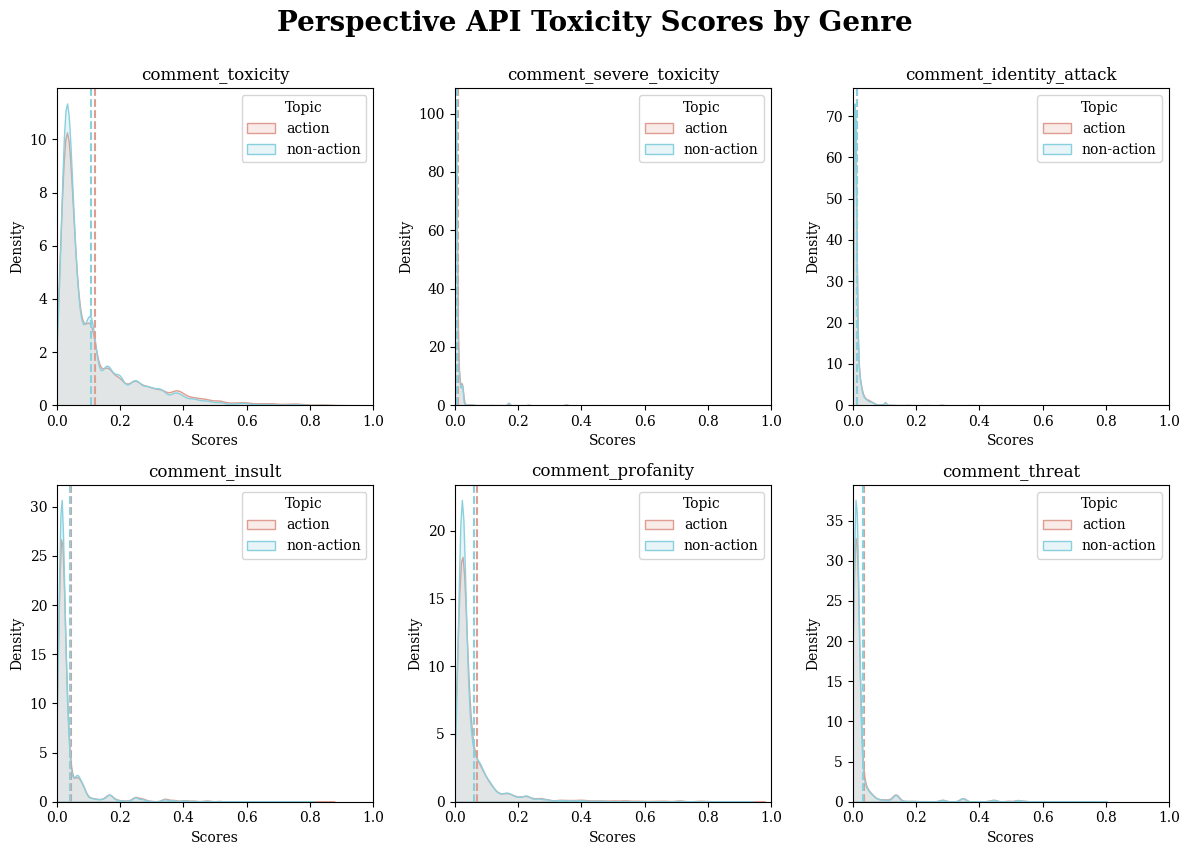

In [14]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by channel
for i, col in enumerate(toxicity_cols):
    for genre, group in yt.groupby("video_genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i // 3, i % 3], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i // 3, i % 3].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i // 3, i % 3].set_title(col)
    axes[i // 3, i % 3].set_xlabel("Scores")
    axes[i // 3, i % 3].set_ylabel("Density")
    axes[i // 3, i % 3].set_xlim(0, 1)
    axes[i // 3, i % 3].legend(title = "Topic")

# Display the plot
fig.suptitle("Perspective API Toxicity Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/01b-toxicity-by-genre.png", dpi=300, transparent=True)
plt.show()

### Hypothesis Testing 

In [15]:
# Define the samples
s1 = yt[yt["video_genre"] == "non-action"]["comment_toxicity"]
s2 = yt[yt["video_genre"] == "action"]["comment_toxicity"]

# Significance level
alpha = 0.05

In [16]:
# Perform KS test to assess if the sample distributions are approximately normal
# Alternatives: Anderson-Darling, Shapiro-Wilk (better for smaller samples)
# KS test: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm
for s in (s1, s2): 
    d, p = stats.kstest(s, "norm")
    print(f"KS test statistic: {d:.4f}")
    print(f"p-value: {p:.4f}")

    # Interpret the result
    if p > alpha:
        print("Fail to reject H0: Sample distribution is approximately normal.")
    else:
        print("Reject H0: Sample distribution is not approximately normal.\n")

KS test statistic: 0.5012
p-value: 0.0000
Reject H0: Sample distribution is not approximately normal.

KS test statistic: 0.5014
p-value: 0.0000
Reject H0: Sample distribution is not approximately normal.



In [17]:
# Perform Levene test for equal variances
# Less sensitive to departures from normality
# Levene test: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm
w, p = stats.levene(s1, s2)
print(f"Levene test statistic: {w:.4f}")
print(f"p-value: {p:.4f}")

# Interpret the result
if p > alpha:
    print("Fail to reject H0: The samples have equal variances.")
else:
    print("Reject H0: The samples do not have equal variances.\n")

Levene test statistic: 225.3387
p-value: 0.0000
Reject H0: The samples do not have equal variances.



In [18]:
# Perform KS test for equal distribution
# Nonparametric test that compares cumulative distributions of two unmatched groups
# Based on the largest discrepancy between distributions
# KS test: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm
d, p = stats.kstest(s1, s2)
print(f"KS test statistic: {d:.4f}")
print(f"p-value: {p:.4f}")

# Interpret the result
if p > alpha:
    print("Fail to reject H0: The samples come from the same distribution.")
else:
    print("Reject H0: The samples come from different distributions.\n")

KS test statistic: 0.0231
p-value: 0.0000
Reject H0: The samples come from different distributions.



In [19]:
# Perform K-S test for each column
for col in toxicity_cols:
    # Define the samples
    s1 = yt[yt["video_genre"] == "non-action"][col]
    s2 = yt[yt["video_genre"] == "action"][col]

    # Perform KS test for equal distribution
    d, p = stats.kstest(s1, s2)
    print(f"KS Test for {col}")
    print(f"KS test statistic: {d:.4f}")
    print(f"p-value: {p:.4f}")

    # Interpret the result
    if p > alpha:
        print(f"Fail to reject H0: The samples come from the same distribution.")
    else:
        print(f"Reject H0: The samples come from different distributions.\n")

KS Test for comment_toxicity
KS test statistic: 0.0231
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for comment_severe_toxicity
KS test statistic: 0.0222
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for comment_identity_attack
KS test statistic: 0.0134
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for comment_insult
KS test statistic: 0.0171
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for comment_profanity
KS test statistic: 0.0209
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for comment_threat
KS test statistic: 0.0165
p-value: 0.0000
Reject H0: The samples come from different distributions.



In [20]:
# # Perform Mann-Whitney U test for equal distribution
# # Nonparametric test that compares two unpaired groups
# # Based on discrepancy between the mean ranks of the two groups
# # KS test vs MWU test: https://www.graphpad.com/guides/prism/latest/statistics/stat_choosing_between_the_mann-whit.htm
# u, p = stats.mannwhitneyu(s1, s2)
# print(f"MWU-test statistic: {u:.4f}")
# print(f"p-value: {p:.4f}")

In [21]:
# # Perform two-sample two-sided t-test
# t, p = stats.ttest_ind(yt[yt["video_genre"] == "action"]["toxicity"], 
#                        yt[yt["video_genre"] == "non-action"]["toxicity"],
#                        alternative = "two-sided")
# print(f"t-test statistic: {t:.4f}")
# print(f"p-value: {p:.4f}")

In [22]:
# # Perform chi-square test
# # Is there a relationship between genre and is_toxicity? 
# contingency_table = pd.crosstab(yt["video_genre"], yt["is_toxicity"])
# chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# print(f"Chi-squared test statistic: {chi2:.4f}")
# print(f"p-value: {p:.4f}")

<br>

## 2. Sentiment Score Distribution

### VADER Sentiment

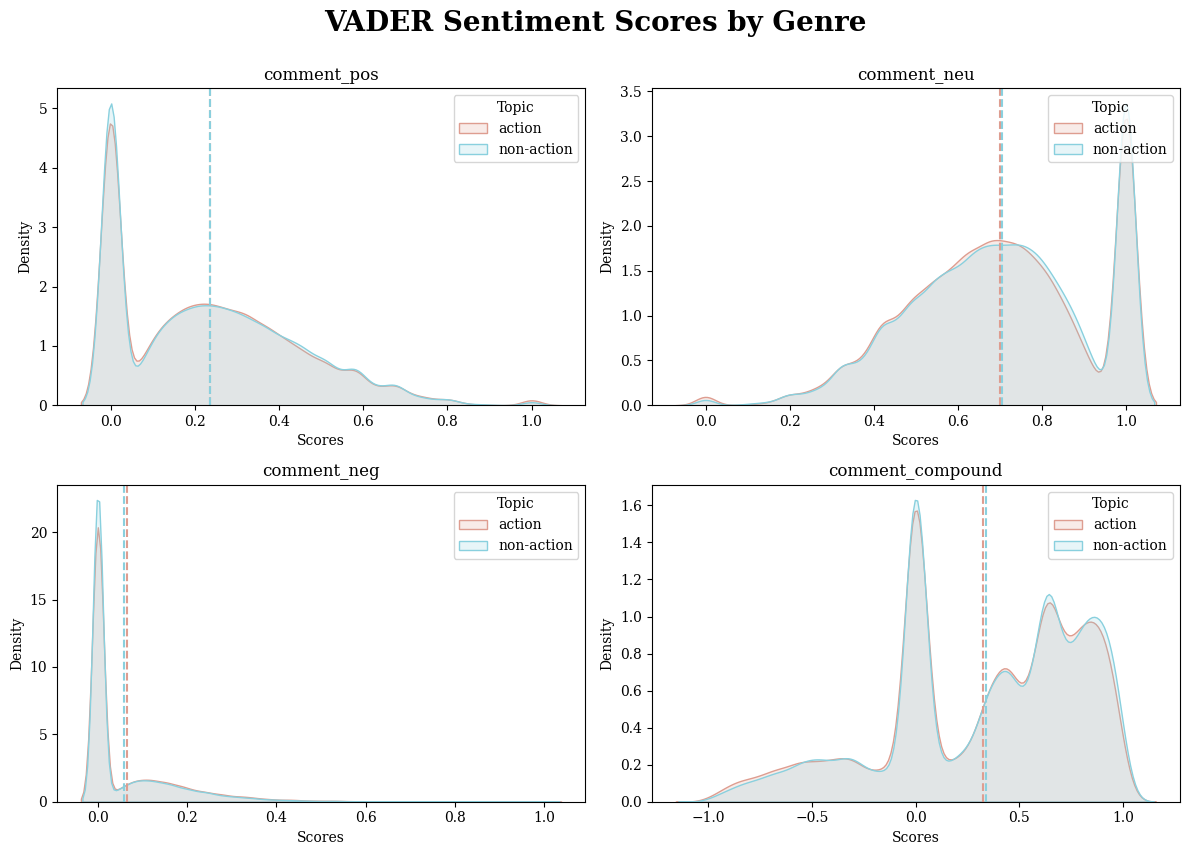

In [23]:
# Columns to plot
vader_cols = ["comment_pos", "comment_neu", "comment_neg", "comment_compound"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by channel
for i, col in enumerate(vader_cols):
    for genre, group in yt.groupby("video_genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i // 2, i % 2], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i // 2, i % 2].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i // 2, i % 2].set_title(col)
    axes[i // 2, i % 2].set_xlabel("Scores")
    axes[i // 2, i % 2].set_ylabel("Density")
    axes[i // 2, i % 2].legend(title = "Topic")

# Display the plot
fig.suptitle("VADER Sentiment Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/02a-sentiment-vader-by-genre.png", dpi=300, transparent=True)
plt.show()

### TextBlob Sentiment

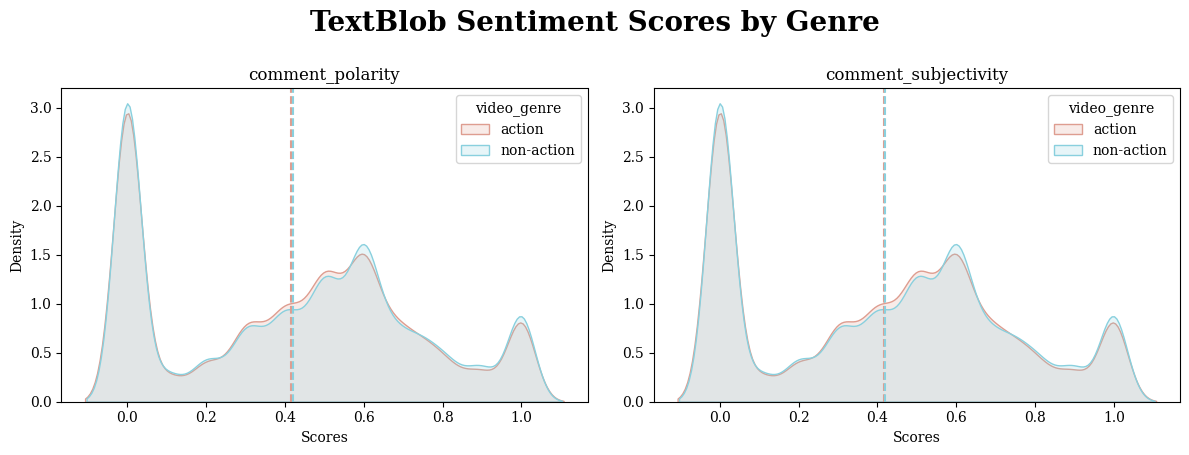

In [24]:
# Columns to plot
textblob_cols = ["comment_polarity", "comment_subjectivity"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(textblob_cols):
    for genre, group in yt.groupby("video_genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Scores")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "video_genre")

# Display the plot
fig.suptitle("TextBlob Sentiment Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/02b-sentiment-textblob-by-genre.png", dpi=300, transparent=True)
plt.show()

### Empath Sentiment

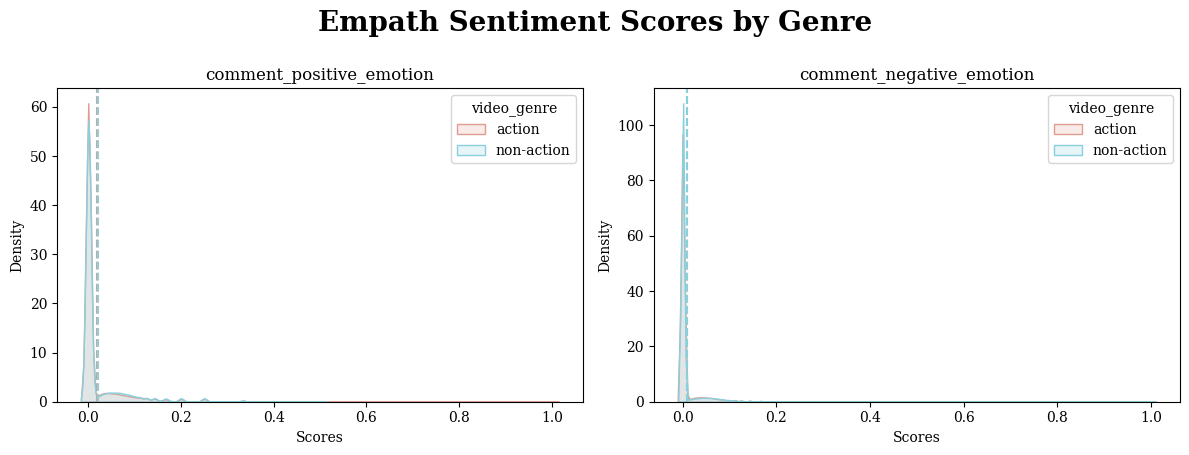

In [25]:
# Columns to plot
empath_cols = ["comment_positive_emotion", "comment_negative_emotion"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(empath_cols):
    for genre, group in yt.groupby("video_genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Scores")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "video_genre")

# Display the plot
fig.suptitle("Empath Sentiment Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/02c-sentiment-empath-by-genre.png", dpi=300, transparent=True)
plt.show()

<br>

## 3. Engagement Metrics Distribution

### All Comments

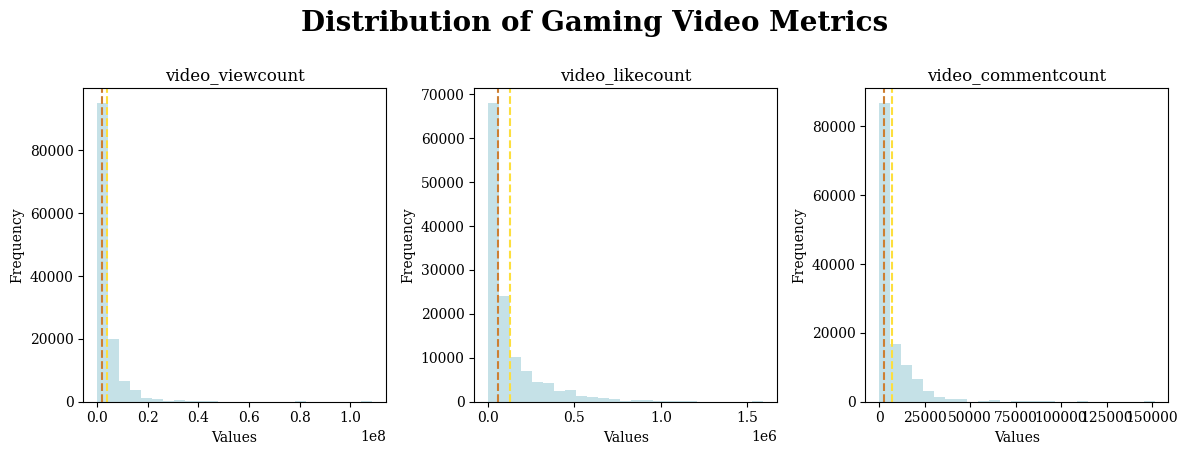

In [26]:
# Columns to plot
video_cols = ["video_viewcount", "video_likecount", "video_commentcount"]

# Set up the figure with subplots
plt.rcParams.update({"font.family": "serif"})
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4.5))

# Visualize the distribution of video metrics
for i, col in enumerate(video_cols):
    # Plot the histogram
    axes[i].hist(yt[col], bins = 25, color = "#C5E1E7")
    # Plot the average line
    axes[i].axvline(yt[col].mean(), color = "#FDDF3D", linestyle = "--")
    # Plot the median line
    axes[i].axvline(yt[col].median(), color = "#CD7F32", linestyle = "--")
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")
    
# Display the plot
fig.suptitle("Distribution of Gaming Video Metrics", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03a-metrics-video-distribution.png", dpi=300, transparent=True)
plt.show()

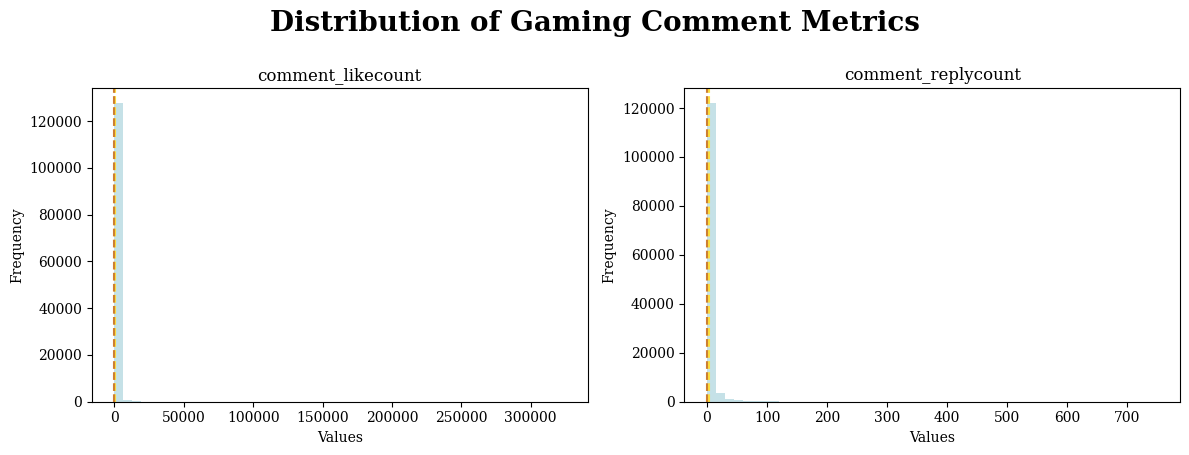

In [27]:
# Columns to plot
comment_cols = ["comment_likecount", "comment_replycount"]

# Set up the figure with subplots
plt.rcParams.update({"font.family": "serif"})
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Visualize the distribution of comment metrics
for i, col in enumerate(comment_cols):
    # Plot the histogram
    axes[i].hist(yt[col], bins = 50, color = "#C5E1E7")
    # Plot the average line
    axes[i].axvline(yt[col].mean(), color = "#FDDF3D", linestyle = "--")
    # Plot the median line
    axes[i].axvline(yt[col].median(), color = "#CD7F32", linestyle = "--")
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")
    
# Display the plot
fig.suptitle("Distribution of Gaming Comment Metrics", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03a-metrics-comment-distribution.png", dpi=300, transparent=True)
plt.show()

### Action vs Non-Action

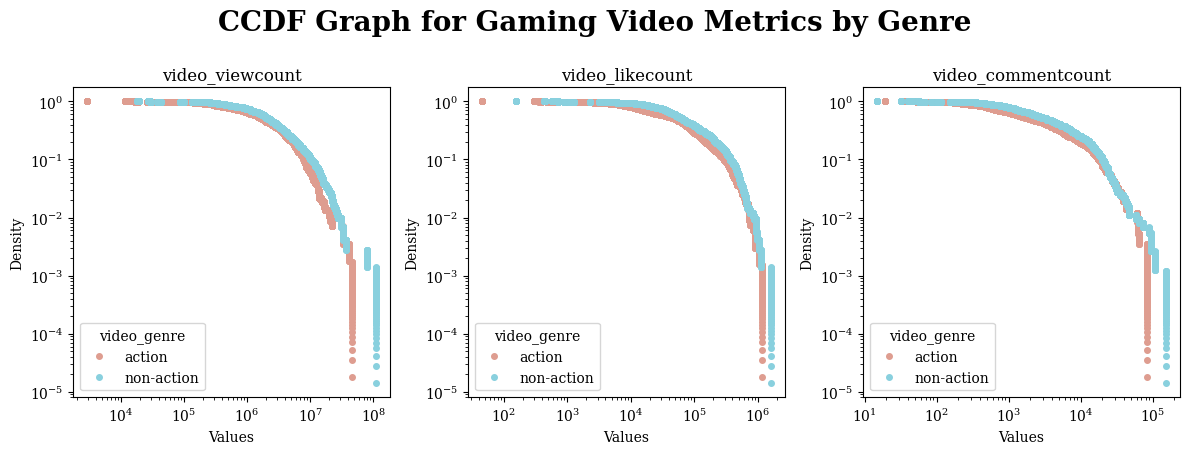

In [28]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the CCDFs by genre
for i, col in enumerate(video_cols):
    for genre, group in yt.groupby("video_genre"):
        # Sort data
        sorted_data = np.sort(group[col])
        # Calculate CCDF
        ccdf = 1. - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        # Plot
        axes[i].loglog(sorted_data, ccdf, label=genre, color=colors[genre], marker='o', linestyle='', markersize=4)
       
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "video_genre")

# Display the plot
fig.suptitle("CCDF Graph for Gaming Video Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03b-metrics-video-ccdf-by-genre.png", dpi=300, transparent=True)
plt.show()

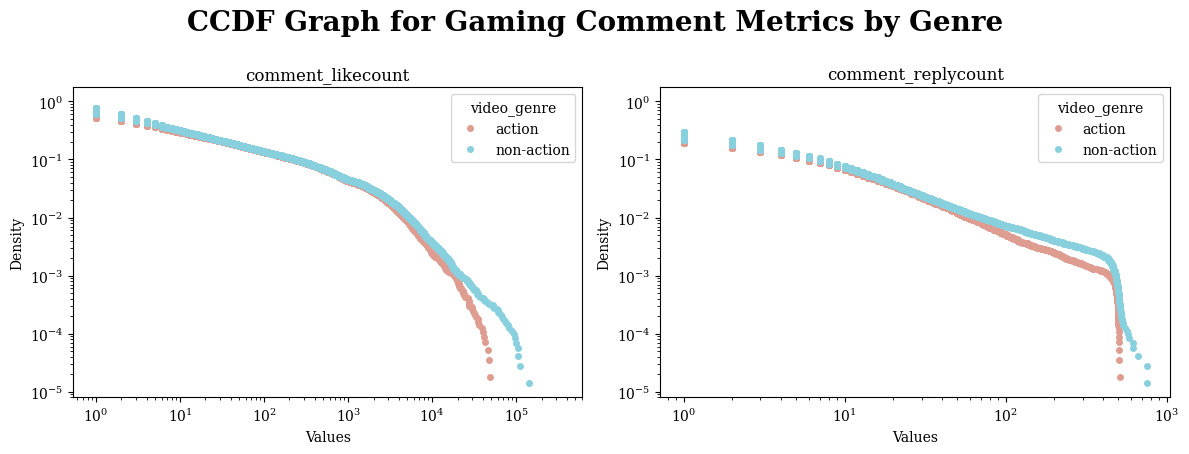

In [29]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the CCDFs by genre
for i, col in enumerate(comment_cols):
    for genre, group in yt.groupby("video_genre"):
        # Sort data
        sorted_data = np.sort(group[col])
        # Calculate CCDF
        ccdf = 1. - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        # Plot
        axes[i].loglog(sorted_data, ccdf, label=genre, color=colors[genre], marker='o', linestyle='', markersize=4)
       
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "video_genre")

# Display the plot
fig.suptitle("CCDF Graph for Gaming Comment Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03b-metrics-comment-ccdf-by-genre.png", dpi=300, transparent=True)
plt.show()

**Complementary Cumulative Distribution Function (CCDF)**: Gives the probability that a random variable $X$ takes on a value greater than $x$.  

$CCDF(x) = 1 - F(x) = P(X > x)$

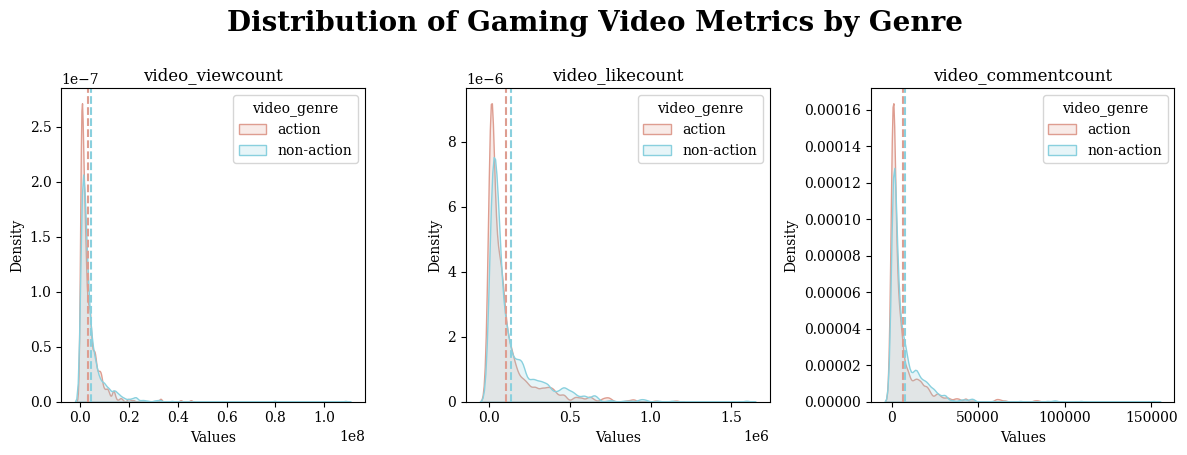

In [30]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(video_cols):
    for genre, group in yt.groupby("video_genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "video_genre")

# Display the plot
fig.suptitle("Distribution of Gaming Video Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03c-metrics-video-distribution-by-genre.png", dpi=300, transparent=True)
plt.show()

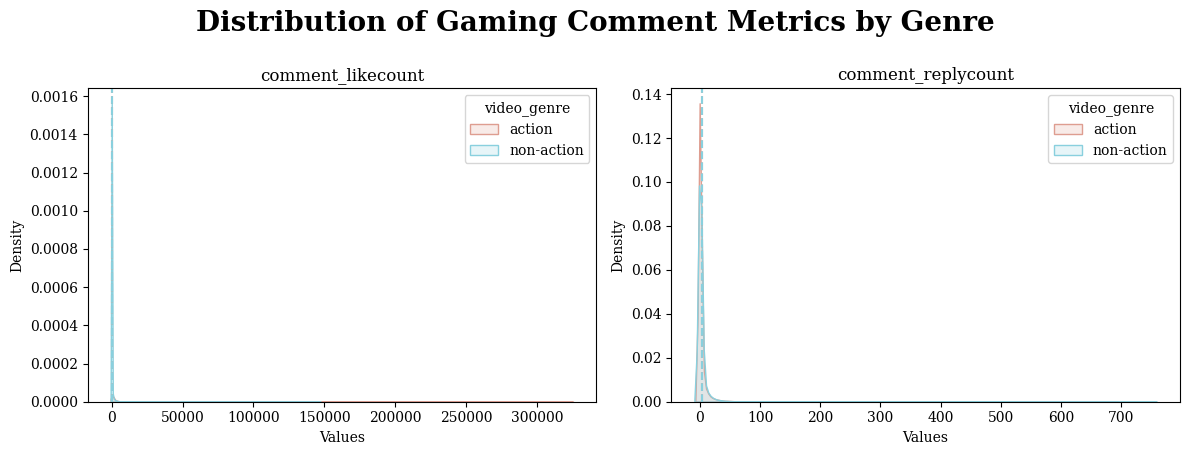

In [31]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(comment_cols):
    for genre, group in yt.groupby("video_genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "video_genre")

# Display the plot
fig.suptitle("Distribution of Gaming Comment Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03c-metrics-comment-distribution-by-genre.png", dpi=300, transparent=True)
plt.show()

<br>

## 4. Word Cloud

In [32]:
# Import the libraries
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [33]:
# Concatenate the improvements text
all_comments = " ".join(yt["comment_cleaned"])
all_action_comments = "".join(yt["comment_cleaned"][yt["video_genre"] == "action"])
all_nonaction_comments = "".join(yt["comment_cleaned"][yt["video_genre"] == "non-action"])

In [34]:
def generate_wordcloud(text, image_path="../asset/image/yt.png", 
                       min_font_size=30, max_font_size=135,
                       max_words=250):
    """
    Generate and display a word cloud for a given text.  
    """

    # Create the mask
    mask = np.array(Image.open(image_path))

    # Grab the mask colors
    colors = ImageColorGenerator(mask)

    # Define the wordcloud
    cloud = WordCloud(mask = mask,
                      background_color = "white",
                      color_func = colors, 
                      font_path = "../asset/font/Montserrat-Medium.ttf",
                      min_font_size = min_font_size, 
                      max_font_size = max_font_size, 
                      max_words = max_words).generate(text)

    # Plot the wordcloud
    fig = plt.figure(figsize = (16,12))
    _ = plt.imshow(cloud)
    _ = plt.axis("off")
    return plt

### All Comments

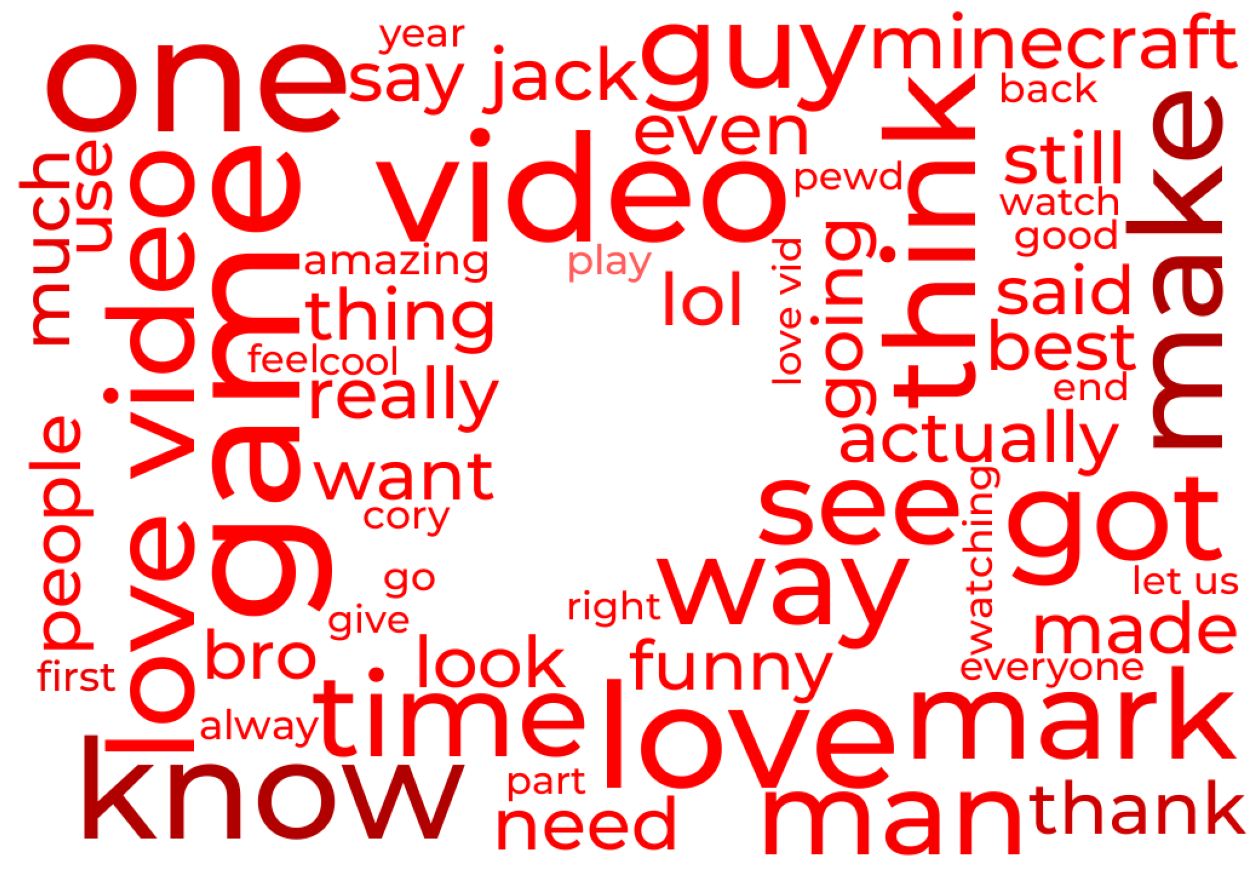

In [35]:
# Word Cloud for all comments
generate_wordcloud(all_comments)
plt.savefig(f"../viz/04a-wordcloud-all-comments.png", dpi=300, transparent=True)
plt.show()

In [36]:
# Set up the vectorizer and remove the stop words
vectorizer = CountVectorizer(stop_words = "english")

# Create the DTM
DTM = vectorizer.fit_transform([all_comments])

# Retrieve the feature names
vocabulary = vectorizer.get_feature_names_out()

# Sort the words by the number of occurrences
DTM_sorted = pd.Series(np.squeeze(DTM.toarray()), index = vocabulary)
DTM_sorted.sort_values(ascending = False, inplace = True)
DTM_sorted.head(10)

love         18316
like         12523
videos        8902
video         8480
game          7501
minecraft     6750
make          6566
good          5972
best          5452
series        5054
dtype: int64

### Action vs Non-Action

In [ ]:
# Word Cloud for all action comments
generate_wordcloud(all_action_comments, "../asset/image/red.png")
plt.savefig(f"../viz/04b-wordcloud-action.png", dpi=300, transparent=True)
plt.show()

In [ ]:
# Word Cloud for all non-action comments
generate_wordcloud(all_nonaction_comments, "../asset/image/blue.png")
plt.savefig(f"../viz/04c-wordcloud-nonaction.png", dpi=300, transparent=True)
plt.show()